In [ ]:
# library("devtools")
# devtools::install("/home/jovyan/apsim/rapsimx", dependencies = TRUE)

In [1]:
# detach("package:ApsimOnR", unload = TRUE)
# remove.packages("ApsimOnR")

# remotes::install_github("luanabeckerdaluz/ApsimOnR")
# packageVersion("ApsimOnR")

In [1]:
# detach("package:rapsimx", unload = TRUE)
# remove.packages("rapsimx")

# remotes::install_github("luanabeckerdaluz/rapsimx")
# packageVersion("rapsimx")

# Example:
https://github.com/APSIMInitiative/ApsimOnR/blob/91fd7b9975f7dc26d94cd8ed2677fe6bc7afb9ef/scripts/simple_run_example.R#L48

In [3]:
# library("CroptimizR")
# library("ApsimOnR")
# library("dplyr")
# library("CroPlotR")
# library("gridExtra")
# library("ggplot2")
# library("tidyr")
# library(RSQLite)
library("rapsimx")

In [4]:
# dotnet_path <- "/home/jovyan/dotnet"
# apsimx_path="/home/jovyan/apsim_7850/usr/local/bin/Models"

apsimx_path="/home/jovyan/apsim_7504/usr/local/bin/Models"
dotnet_path <- "/home/jovyan/dotnet6"

# Set dotnet to system PATH
if (!grepl(dotnet_path, Sys.getenv("PATH"), fixed = TRUE)) {
  Sys.setenv(PATH = paste(Sys.getenv("PATH"), dotnet_path, sep = ":"))
}

In [6]:
# files_path <- system.file(file.path("extdata","apsimx_files"),package = "ApsimOnR")
# apsimx_file <- file.path(files_path, "template.apsimx")
# apsimx_file <- "/home/jovyan/apsim_7850/usr/local/lib/apsim/2025.9.7850.0/Examples/Wheat.apsimx"

files_path <- "/home/jovyan/apsim/wrapper_example/"

apsimx_file <- file.path(files_path, "cal.apsimx")
apsimx_file

# variable_names=c("Wheat.Leaf.LAI")
# variable_names=c("Wheat.LAI")
# variable_names=c("Soybean.LAI")

model_options = rapsimx::rapsimx_wrapper_options(
    apsimx_path = apsimx_path,
    apsimx_file = apsimx_file,
    # variable_names = variable_names,
    # predicted_table_name = "DailyReport",
    predicted_table_name = "HarvestReport",
    met_files_path = files_path,
    obs_files_path = files_path,
)
model_options

sim = rapsimx::rapsimx_wrapper(
    model_options = model_options,
    verbose = FALSE
)
sim

[1] "/home/jovyan/apsim/wrapper_example//cal.apsimx"

$apsimx_path
[1] "/home/jovyan/apsim_7504/usr/local/bin/Models"

$apsimx_file
[1] "/home/jovyan/apsim/wrapper_example//cal.apsimx"

$variable_names
[1] "Clock.Today"

$predicted_table_name
[1] "HarvestReport"

$observed_table_name
[1] "Observed"

$met_files_path
[1] "/home/jovyan/apsim/wrapper_example/"

$obs_files_path
[1] "/home/jovyan/apsim/wrapper_example/"

$warning_display
[1] TRUE

$multi_process
[1] FALSE

$time_display
[1] FALSE

✔ run_apsimx function returned object class logical!

✔ read_db_table | Table HarvestReport was read!



$db_file_name
[1] "/tmp/RtmpFIsjD1/simulationkRCiCr.db"

$sim_list
$CheckpointID
[1] 1 1 1

$SimulationID
[1] 1 2 3

$Zone
[1] "paddock" "paddock" "paddock"

$Clock.Today
[1] "2016-03-29 12:00:00" "2017-03-31 12:00:00" "2018-04-01 12:00:00"

$Biomass
[1] 9659.162 9919.084 8698.238

$Yield
[1] 4875.366 4705.709 3821.241

$Soybean.Phenology.FloweringDAS
[1] 49 61 49

$Soybean.Phenology.MaturityDAS
[1] 120 132 121

attr(,"class")
[1] "cropr_simulation"
attr(,"row.names")
[1] 1 2 3


In [7]:
# param_values <- c(.Simulations.Wheat.Plant.Population = 150)
# param_values <- c(.Simulations.Wheat.Crop.SowingDepth = 50)
# param_values <- c(.Simulations.Crop.Wheat.SowingDepth = 50)
# param_values <- c(.Simulations.Replacements.Soybean.Leaf.Phyllochron.FixedValue = 45)
param_values <- c(phen_EarlyFloweringTarget = 140)

sim_par_forcing = rapsimx::rapsimx_wrapper(
    model_options = model_options,
    param_values = param_values,
    verbose = FALSE
)
sim_par_forcing

✔ run_apsimx function returned object class logical!

✔ read_db_table | Table HarvestReport was read!



$db_file_name
[1] "/tmp/RtmpFIsjD1/simulationzP8HHZ.db"

$sim_list
$CheckpointID
[1] 1 1 1

$SimulationID
[1] 1 2 3

$Zone
[1] "paddock" "paddock" "paddock"

$Clock.Today
[1] "2016-03-25 12:00:00" "2017-03-27 12:00:00" "2018-03-28 12:00:00"

$Biomass
[1] 9329.246 9566.865 8549.130

$Yield
[1] 4677.730 4586.565 3918.362

$Soybean.Phenology.FloweringDAS
[1] 49 61 49

$Soybean.Phenology.MaturityDAS
[1] 117 129 118

attr(,"class")
[1] "cropr_simulation"
attr(,"row.names")
[1] 1 2 3


In [8]:
sim$sim_list$Clock.Today
sim_par_forcing$sim_list$Clock.Today

sim$sim_list$Biomass
sim_par_forcing$sim_list$Biomass

sim$sim_list$Yield
sim_par_forcing$sim_list$Yield

sim$sim_list$Soybean.Phenology.FloweringDAS
sim_par_forcing$sim_list$Soybean.Phenology.FloweringDAS


[1] "2016-03-29 12:00:00" "2017-03-31 12:00:00" "2018-04-01 12:00:00"

[1] "2016-03-25 12:00:00" "2017-03-27 12:00:00" "2018-03-28 12:00:00"

[1] 9659.162 9919.084 8698.238

[1] 9329.246 9566.865 8549.130

[1] 4875.366 4705.709 3821.241

[1] 4677.730 4586.565 3918.362

[1] 49 61 49

[1] 49 61 49

In [117]:
# #================================================
# # RESULTS
# #================================================

# situation_name <- "Biomass"

# Dates <- as.Date(sim$sim_list[situation_name][[1]]$Date)
# LAI <- sim$sim_list[situation_name][[1]]$Wheat.Leaf.LAI
# LAI_forcing <- sim_par_forcing$sim_list[situation_name][[1]]$Wheat.Leaf.LAI

# print(paste("Length:", length(Dates)))
# print("Printing first 5 data:")
# print(Dates[1:5])
# print(LAI[1:5])
# print(LAI_forcing[1:5])

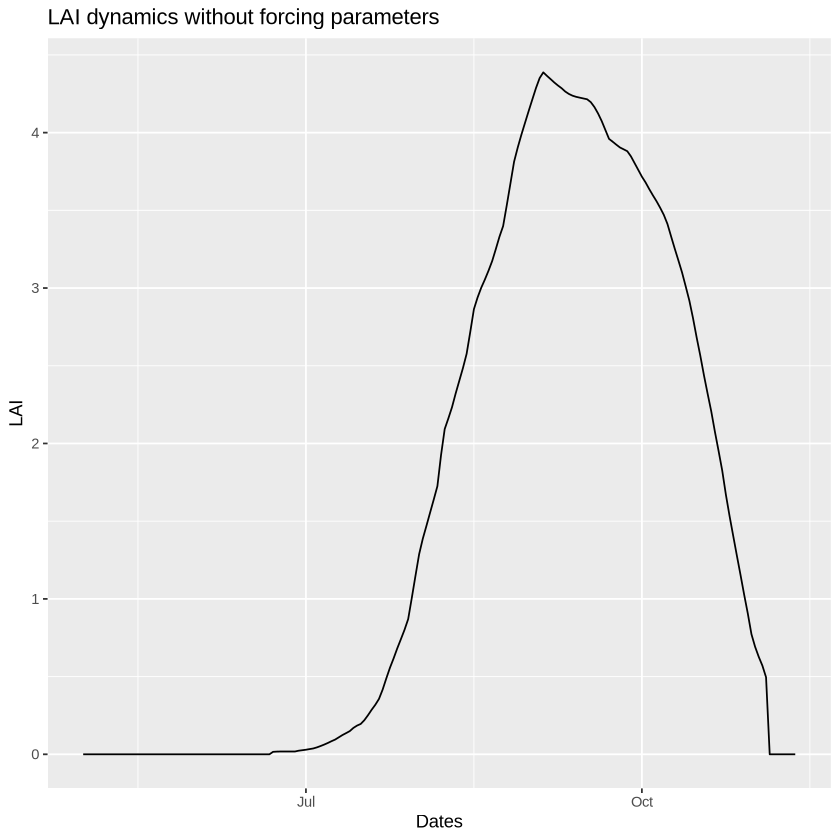

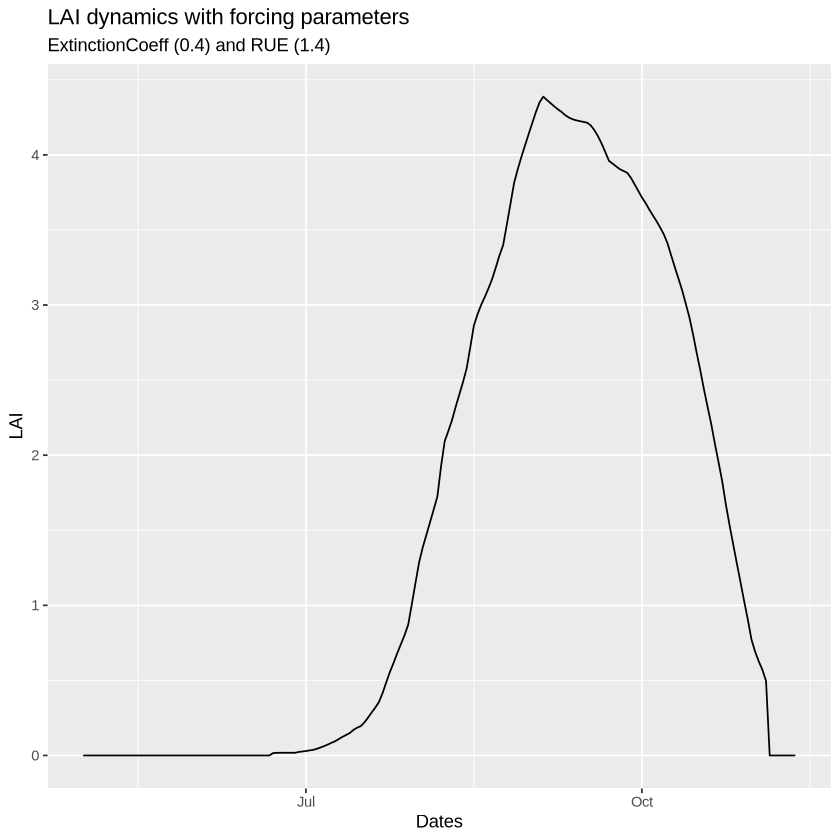

In [90]:
ggplot(data.frame(Dates=Dates,LAI=LAI), aes(x=Dates, y=LAI)) +
  geom_line() +
  labs(title="LAI dynamics without forcing parameters")


ggplot(data.frame(Dates=Dates,LAI=LAI_forcing), aes(x=Dates, y=LAI)) +
  geom_line() +
  labs(title="LAI dynamics with forcing parameters",
  subtitle = "ExtinctionCoeff (0.4) and RUE (1.4)" )